In [41]:
#import sys
#!{sys.executable} -m pip install osr

In [42]:
import ee
ee.Initialize()

In [43]:
from osgeo import gdal
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import elevation 

In [44]:
summit_lat = 34.0738
summit_long = -118.8328
summit_alt = 764

summit_lat_min = float('{:.8f}'.format(summit_lat-0.005))
summit_lat_max = float('{:.8f}'.format(summit_lat+0.005))
summit_long_min = float('{:.8f}'.format(summit_long-0.005))
summit_long_max = float('{:.8f}'.format(summit_long+0.005))

summit_alt_az_min = summit_alt - 25
print("AZ Altitude Cutoff: ", summit_alt_az_min)

summit_extent = [summit_long_min,summit_long_max,summit_lat_min,summit_lat_max]
print(summit_extent)

!eio clip -o W6SC229-30m-DEM.tif --bounds {summit_long_min} {summit_lat_min} {summit_long_max} {summit_lat_max}

AZ Altitude Cutoff:  739
[-118.8378, -118.8278, 34.0688, 34.0788]
make: Nothing to be done for `download'.
make: Nothing to be done for `all'.
cp SRTM1.vrt SRTM1.6efd92fbe102445d92f2e9ee7977c8ed.vrt
gdal_translate -q -co TILED=YES -co COMPRESS=DEFLATE -co ZLEVEL=9 -co PREDICTOR=2 -projwin -118.8378 34.0788 -118.8278 34.0688 SRTM1.6efd92fbe102445d92f2e9ee7977c8ed.vrt /Users/arko/GitHub/azgen/W6SC229-30m-DEM.tif
rm -f SRTM1.6efd92fbe102445d92f2e9ee7977c8ed.vrt


In [45]:
filename = "W6SC229-30m-DEM.tif"
gdal_data = gdal.Open(filename)
gdal_band = gdal_data.GetRasterBand(1)
nodataval = gdal_band.GetNoDataValue()

# convert to a numpy array
dem = gdal_data.ReadAsArray().astype(np.float)
dem

# replace missing values if necessary
if np.any(dem == nodataval):
    dem[dem == nodataval] = np.nan

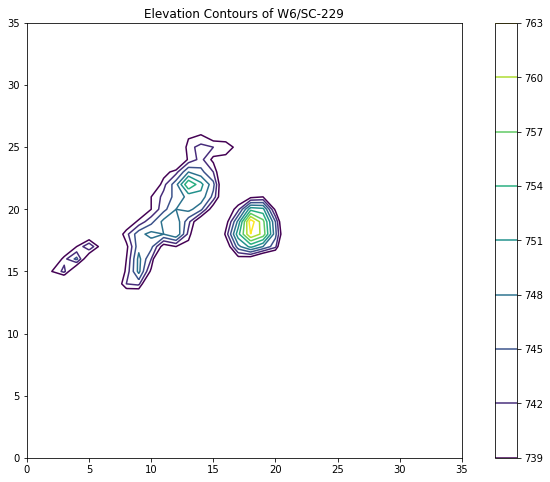

In [46]:
#Plot out data with Matplotlib's 'contour'
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)
plt.contour(dem, cmap = "viridis", 
            levels = list(range(summit_alt_az_min, summit_alt, 3)))
plt.title("Elevation Contours of W6/SC-229")
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

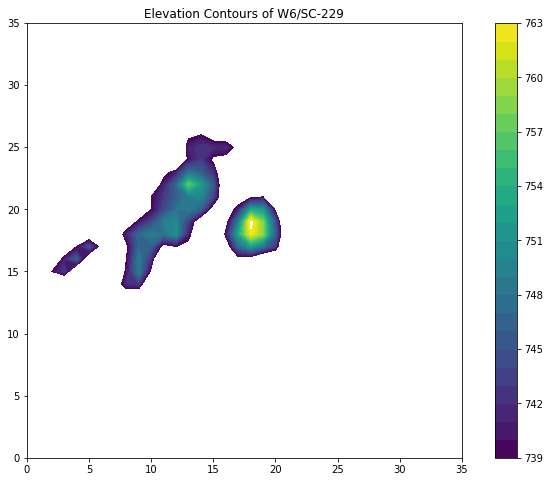

In [47]:
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)
plt.contourf(dem, cmap = "viridis", 
            levels = list(range(summit_alt_az_min, summit_alt, 1)))
plt.savefig( "./my_img.png" )
plt.title("Elevation Contours of W6/SC-229")
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

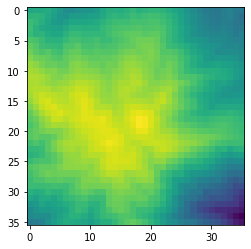

Data Array Size: (36, 36)
[[615. 620. 622. ... 564. 552. 550.]
 [636. 639. 635. ... 562. 548. 536.]
 [651. 642. 629. ... 556. 545. 544.]
 ...
 [574. 590. 600. ... 442. 437. 427.]
 [572. 580. 582. ... 434. 415. 401.]
 [552. 554. 563. ... 457. 433. 421.]]


In [48]:
plt.imshow(dem)
plt.show()
print("Data Array Size:", dem.shape)
print(dem)

18 18


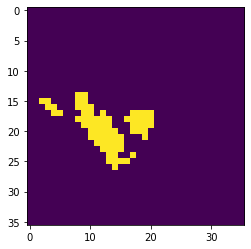

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [49]:
num_x, num_y = dem.shape

center_x = int(num_x/2)
center_y = int(num_y/2)
print(center_x, center_y)


az_mask = np.zeros((num_x, num_y))

for x in range(num_x):
    for y in range(num_y):
        if dem[x,y] >= summit_alt_az_min:
            az_mask[x,y] = 1

plt.imshow(az_mask)
plt.show()
print(az_mask)

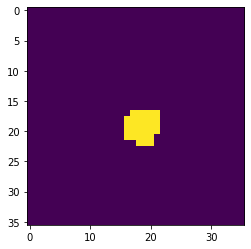

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


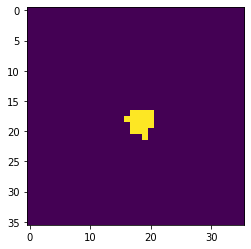

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [50]:
az_mask_s = np.zeros((num_x, num_y))
az_mask_s[center_x,center_y] = 2 

az = np.zeros((num_x, num_y))

for x in range(num_x):
    for y in range(num_y):
        if az_mask_s[x,y] == 2 and az_mask[x,y] == 1:
            az_mask_s[x+1,y+1] = 2
            az_mask_s[x+1,y-1] = 2
            az_mask_s[x-1,y+1] = 2
            az_mask_s[x-1,y-1] = 2
            
            az_mask_s[x+1,y] = 2
            az_mask_s[x-1,y] = 2
            az_mask_s[x,y+1] = 2
            az_mask_s[x,y+1] = 2

for x in range(num_x):
    for y in range(num_y):
        if az_mask_s[x,y] == 2 and az_mask[x,y] == 1:
            az[x,y] = 1

            
plt.imshow(az_mask_s)
plt.show()
print(az_mask_s)

plt.imshow(az)
plt.show()
print(az)

In [51]:
az_lat_step = (summit_lat_max-summit_lat_min)/num_y
az_long_step = (summit_long_max-summit_long_min)/num_x

print(az_lat_step)
print(az_long_step)

lat = np.zeros((num_x, num_y))
long = np.zeros((num_x, num_y))

for x in range(num_x):
    for y in range(num_y):
        lat[x,y] = summit_lat_max - (az_lat_step*x)
        long[x,y] = summit_long_min + (az_long_step*y)

print(lat)
print(long)

0.00027777777777772254
0.00027777777777791986
[[34.0788     34.0788     34.0788     ... 34.0788     34.0788
  34.0788    ]
 [34.07852222 34.07852222 34.07852222 ... 34.07852222 34.07852222
  34.07852222]
 [34.07824444 34.07824444 34.07824444 ... 34.07824444 34.07824444
  34.07824444]
 ...
 [34.06963333 34.06963333 34.06963333 ... 34.06963333 34.06963333
  34.06963333]
 [34.06935556 34.06935556 34.06935556 ... 34.06935556 34.06935556
  34.06935556]
 [34.06907778 34.06907778 34.06907778 ... 34.06907778 34.06907778
  34.06907778]]
[[-118.8378     -118.83752222 -118.83724444 ... -118.82863333
  -118.82835556 -118.82807778]
 [-118.8378     -118.83752222 -118.83724444 ... -118.82863333
  -118.82835556 -118.82807778]
 [-118.8378     -118.83752222 -118.83724444 ... -118.82863333
  -118.82835556 -118.82807778]
 ...
 [-118.8378     -118.83752222 -118.83724444 ... -118.82863333
  -118.82835556 -118.82807778]
 [-118.8378     -118.83752222 -118.83724444 ... -118.82863333
  -118.82835556 -118.828077

In [52]:
for x in range(num_x):
    for y in range(num_y):
        if az[x,y] == 1:
            print("Lat: ", lat[x,y], "Long: ", long[x,y], "Alt: ", dem[x,y])

Lat:  34.07407777777778 Long:  -118.83307777777777 Alt:  747.0
Lat:  34.07407777777778 Long:  -118.83279999999999 Alt:  752.0
Lat:  34.07407777777778 Long:  -118.83252222222222 Alt:  748.0
Lat:  34.07407777777778 Long:  -118.83224444444444 Alt:  743.0
Lat:  34.073800000000006 Long:  -118.83335555555556 Alt:  740.0
Lat:  34.073800000000006 Long:  -118.83307777777777 Alt:  753.0
Lat:  34.073800000000006 Long:  -118.83279999999999 Alt:  763.0
Lat:  34.073800000000006 Long:  -118.83252222222222 Alt:  759.0
Lat:  34.073800000000006 Long:  -118.83224444444444 Alt:  746.0
Lat:  34.07352222222222 Long:  -118.83307777777777 Alt:  749.0
Lat:  34.07352222222222 Long:  -118.83279999999999 Alt:  765.0
Lat:  34.07352222222222 Long:  -118.83252222222222 Alt:  758.0
Lat:  34.07352222222222 Long:  -118.83224444444444 Alt:  745.0
Lat:  34.07324444444445 Long:  -118.83307777777777 Alt:  741.0
Lat:  34.07324444444445 Long:  -118.83279999999999 Alt:  753.0
Lat:  34.07324444444445 Long:  -118.83252222222222

In [59]:
from osgeo import ogr
from osgeo import osr
import fileinput
from datetime import datetime
import os

srs = osr.SpatialReference()
srs.ImportFromEPSG(4326)

driver = ogr.GetDriverByName("GPX")

# Remove output shapefile if it already exists
if os.path.exists('./test.gpx'):
    driver.DeleteDataSource('./test.gpx')

    
out = driver.CreateDataSource('./test.gpx')

# layer creation: if you use 'track_points', points are accepted
oL = out.CreateLayer("track_points", srs, ogr.wkbPoint)

# loop over tab-separated input stream with timestamps + lon + lat
for x in range(num_x):
    for y in range(num_y):
        if az[x,y] == 1:

            # create point
            p = ogr.Geometry(ogr.wkbPoint)
            # initialise point with coordinates
            p.AddPoint(float(long[x,y]), float(lat[x,y]))

            # prepare new "feature" using the layer's "feature definition", 
            # initialize it by setting geometry and necessary field values
            featureDefn = oL.GetLayerDefn()
            oF = ogr.Feature(featureDefn)
            oF.SetGeometry(p)
            oF.SetField("track_fid", "1")
            oF.SetField("track_seg_id", "1")    

            # adapt this according to the timestamp format of your data source
            oL.CreateFeature(oF)    

# Collect all Geometry
geomcol = ogr.Geometry(ogr.wkbGeometryCollection)

# loop over tab-separated input stream with timestamps + lon + lat
for x in range(num_x):
    for y in range(num_y):
        if az[x,y] == 1:

            # initialise point with coordinates
            geomcol.AddPoint(float(long[x,y]), float(lat[x,y]))


# Calculate convex hull
convexhull = geomcol.ConvexHull()

# Save extent to a new Shapefile
outShapefile = "./states_convexhull.shp"
outDriver = ogr.GetDriverByName("ESRI Shapefile")

# Remove output shapefile if it already exists
if os.path.exists(outShapefile):
    outDriver.DeleteDataSource(outShapefile)


# Create the output shapefile
outDataSource = outDriver.CreateDataSource(outShapefile)
outLayer = outDataSource.CreateLayer("states_convexhull", geom_type=ogr.wkbPolygon)

# Add an ID field
idField = ogr.FieldDefn("id", ogr.OFTInteger)
outLayer.CreateField(idField)

# Create the feature and set values
featureDefn = outLayer.GetLayerDefn()
feature = ogr.Feature(featureDefn)
feature.SetGeometry(convexhull)
feature.SetField("id", 1)
outLayer.CreateFeature(feature)
feature = None

# Save and close DataSource
inDataSource = None
outDataSource = None

del(out)